In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio ## graph ke templates ke liye
import plotly.colors as colors
pio.templates.default= 'plotly_white'
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Load the Datasets
customer= pd.read_csv(r'C:\Users\UsEr\Downloads\customer.csv')
card= pd.read_csv(r'C:\Users\UsEr\Downloads\credit_card.csv')

## All about information from customer Dataframe

In [3]:
customer.head()

Client_Num  Customer_Age Gender  Dependent_Count Education_Level  \
0   708082083            24      F                1      Uneducated   
1   708083283            62      F                0         Unknown   
2   708084558            32      F                1         Unknown   
3   708085458            38      M                2      Uneducated   
4   708086958            48      M                4        Graduate   

  Marital_Status state_cd  Zipcode Car_Owner House_Owner Personal_loan  \
0         Single       FL    91750        no         yes            no   
1        Married       NJ    91750        no          no            no   
2        Married       NJ    91750       yes          no            no   
3         Single       NY    91750        no          no            no   
4         Single       TX    91750       yes         yes            no   

    contact   Customer_Job  Income  Cust_Satisfaction_Score  
0   unknown    Businessman  202326                        3  
1  cellular  Selfemployeed    5225                        2  
2   unknown  Selfemployeed   14235                        2  
3  cellular    Blue-collar   45683                        1  
4  cellular    Businessman   59279                        1

In [4]:
customer.shape

(10108, 15)

In [5]:
customer.select_dtypes(include='object').columns

Index(['Gender', 'Education_Level', 'Marital_Status', 'state_cd', 'Car_Owner',
       'House_Owner', 'Personal_loan', 'contact', 'Customer_Job'],
      dtype='object')

In [6]:
customer.select_dtypes(include='number').columns

Index(['Client_Num', 'Customer_Age', 'Dependent_Count', 'Zipcode', 'Income',
       'Cust_Satisfaction_Score'],
      dtype='object')

In [7]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10108 entries, 0 to 10107
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Client_Num               10108 non-null  int64 
 1   Customer_Age             10108 non-null  int64 
 2   Gender                   10108 non-null  object
 3   Dependent_Count          10108 non-null  int64 
 4   Education_Level          10108 non-null  object
 5   Marital_Status           10108 non-null  object
 6   state_cd                 10108 non-null  object
 7   Zipcode                  10108 non-null  int64 
 8   Car_Owner                10108 non-null  object
 9   House_Owner              10108 non-null  object
 10  Personal_loan            10108 non-null  object
 11  contact                  10108 non-null  object
 12  Customer_Job             10108 non-null  object
 13  Income                   10108 non-null  int64 
 14  Cust_Satisfaction_Score  10108 non-nul

In [8]:
customer.describe()

Client_Num  Customer_Age  Dependent_Count       Zipcode  \
count  1.010800e+04  10108.000000     10108.000000  10108.000000   
mean   7.390104e+08     46.274436         2.345370  91663.071824   
std    3.673623e+07      8.087876         1.299486   1693.093868   
min    7.080821e+08     21.000000         0.000000  53010.000000   
25%    7.130267e+08     41.000000         1.000000  91750.000000   
50%    7.179037e+08     46.000000         2.000000  91750.000000   
75%    7.727989e+08     52.000000         3.000000  91750.000000   
max    8.278908e+08     73.000000         5.000000  99504.000000   

              Income  Cust_Satisfaction_Score  
count   10108.000000             10108.000000  
mean    56976.101998                 3.189256  
std     46183.718233                 1.263101  
min      1250.000000                 1.000000  
25%     22635.750000                 2.000000  
50%     44768.500000                 3.000000  
75%     76392.750000                 4.000000  
max    239791.000000                 5.000000

## All about information from card Dataframe

In [9]:
card.head()

Client_Num Card_Category  Annual_Fees  Activation_30_Days  \
0   708082083          Blue          200                   0   
1   708083283          Blue          445                   1   
2   708084558          Blue          140                   0   
3   708085458          Blue          250                   1   
4   708086958          Blue          320                   1   

   Customer_Acq_Cost Week_Start_Date Week_Num Qtr  current_year  Credit_Limit  \
0                 87      01-01-2023   Week-1  Q1          2023        3544.0   
1                108      01-01-2023   Week-1  Q1          2023        3421.0   
2                106      01-01-2023   Week-1  Q1          2023        8258.0   
3                150      01-01-2023   Week-1  Q1          2023        1438.3   
4                106      01-01-2023   Week-1  Q1          2023        3128.0   

   Total_Revolving_Bal  Total_Trans_Amt  Total_Trans_Vol  \
0                 1661            15149              111   
1                 2517              992               21   
2                 1771             1447               23   
3                    0             3940               82   
4                  749             4369               59   

   Avg_Utilization_Ratio Use Chip       Exp Type  Interest_Earned  \
0                  0.469    Chip          Travel          4393.21   
1                  0.736   Swipe   Entertainment            69.44   
2                  0.214    Chip           Bills           202.58   
3                  0.000  Online         Grocery           236.40   
4                  0.239   Swipe            Fuel          1004.87   

   Delinquent_Acc  
0               0  
1               0  
2               0  
3               0  
4               1

In [10]:
card.shape

(10108, 18)

In [11]:
card.select_dtypes(include='object').columns

Index(['Card_Category', 'Week_Start_Date', 'Week_Num', 'Qtr', 'Use Chip',
       'Exp Type'],
      dtype='object')

In [12]:
card.select_dtypes(include='number').columns

Index(['Client_Num', 'Annual_Fees', 'Activation_30_Days', 'Customer_Acq_Cost',
       'current_year', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Trans_Amt', 'Total_Trans_Vol', 'Avg_Utilization_Ratio',
       'Interest_Earned', 'Delinquent_Acc'],
      dtype='object')

In [13]:
card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10108 entries, 0 to 10107
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Client_Num             10108 non-null  int64  
 1   Card_Category          10108 non-null  object 
 2   Annual_Fees            10108 non-null  int64  
 3   Activation_30_Days     10108 non-null  int64  
 4   Customer_Acq_Cost      10108 non-null  int64  
 5   Week_Start_Date        10108 non-null  object 
 6   Week_Num               10108 non-null  object 
 7   Qtr                    10108 non-null  object 
 8   current_year           10108 non-null  int64  
 9   Credit_Limit           10108 non-null  float64
 10  Total_Revolving_Bal    10108 non-null  int64  
 11  Total_Trans_Amt        10108 non-null  int64  
 12  Total_Trans_Vol        10108 non-null  int64  
 13  Avg_Utilization_Ratio  10108 non-null  float64
 14  Use Chip               10108 non-null  object 
 15  Ex

In [14]:
card.describe()

Client_Num   Annual_Fees  Activation_30_Days  Customer_Acq_Cost  \
count  1.010800e+04  10108.000000        10108.000000       10108.000000   
mean   7.390104e+08    291.849525            0.574693          96.254056   
std    3.673623e+07    118.339384            0.494414          25.768677   
min    7.080821e+08     95.000000            0.000000          40.000000   
25%    7.130267e+08    195.000000            0.000000          79.000000   
50%    7.179037e+08    295.000000            1.000000          95.000000   
75%    7.727989e+08    395.000000            1.000000         112.000000   
max    8.278908e+08    500.000000            1.000000         172.000000   

       current_year  Credit_Limit  Total_Revolving_Bal  Total_Trans_Amt  \
count       10108.0  10108.000000         10108.000000     10108.000000   
mean         2023.0   8635.642808          1162.792145      4404.631282   
std             0.0   9093.136113           815.160709      3397.910673   
min          2023.0   1438.300000             0.000000       510.000000   
25%          2023.0   2552.750000           355.500000      2155.750000   
50%          2023.0   4549.000000          1276.500000      3899.500000   
75%          2023.0  11070.250000          1784.000000      4741.000000   
max          2023.0  34516.000000          2517.000000     18484.000000   

       Total_Trans_Vol  Avg_Utilization_Ratio  Interest_Earned  Delinquent_Acc  
count     10108.000000           10108.000000     10108.000000    10108.000000  
mean         64.864563               0.274851       775.957878        0.060744  
std          23.475110               0.275720       723.952320        0.238872  
min          10.000000               0.000000        42.140000        0.000000  
25%          45.000000               0.022000       326.150000        0.000000  
50%          67.000000               0.175000       559.985000        0.000000  
75%          81.000000               0.503000       962.685000        0.000000  
max         139.000000               0.999000      4785.000000        1.000000

# Data Exploatary Analysis(EDA) for Customer DataFrame

### 1.) data Cleaning of card dataframe

In [15]:
## Check Null values
customer.isna().sum()

Client_Num                 0
Customer_Age               0
Gender                     0
Dependent_Count            0
Education_Level            0
Marital_Status             0
state_cd                   0
Zipcode                    0
Car_Owner                  0
House_Owner                0
Personal_loan              0
contact                    0
Customer_Job               0
Income                     0
Cust_Satisfaction_Score    0
dtype: int64

In [16]:
## Check Duplicate values
customer.duplicated().sum()

0

- **Step-1 Create a Age Group Column in df**

In [17]:
def age_category(age):
    if age>=21 and age<31:
        return '21-30'
    elif age>=31 and  age<41:
        return '31-40'
    elif age>=41 and age<51:
        return '41-50'
    elif age>=51 and age<61:
        return '51-60'
    elif age>=61 and age<71:
        return '61-70'
    else:
        return '71-80'
customer['Age Group']= customer['Customer_Age'].apply(age_category)

- **Add a new Income Group Columns**

In [18]:
def convert(income):
    if income >=1250 and income <35000:
        return 'Low Class'
    elif income >=35000 and income <70000:
        return 'Middle Class'
    else:
        return 'High Class'
customer['Income Group']= customer['Income'].apply(convert)

In [19]:
customer.head()

Client_Num  Customer_Age Gender  Dependent_Count Education_Level  \
0   708082083            24      F                1      Uneducated   
1   708083283            62      F                0         Unknown   
2   708084558            32      F                1         Unknown   
3   708085458            38      M                2      Uneducated   
4   708086958            48      M                4        Graduate   

  Marital_Status state_cd  Zipcode Car_Owner House_Owner Personal_loan  \
0         Single       FL    91750        no         yes            no   
1        Married       NJ    91750        no          no            no   
2        Married       NJ    91750       yes          no            no   
3         Single       NY    91750        no          no            no   
4         Single       TX    91750       yes         yes            no   

    contact   Customer_Job  Income  Cust_Satisfaction_Score Age Group  \
0   unknown    Businessman  202326                        3     21-30   
1  cellular  Selfemployeed    5225                        2     61-70   
2   unknown  Selfemployeed   14235                        2     31-40   
3  cellular    Blue-collar   45683                        1     31-40   
4  cellular    Businessman   59279                        1     41-50   

   Income Group  
0    High Class  
1     Low Class  
2     Low Class  
3  Middle Class  
4  Middle Class

- **Printing the unique values in all the columns**

In [20]:
# Assuming 'customer' DataFrame already defined and has the columns listed
Cust_cat_cols = ['Gender','Education_Level','Marital_Status',
                          'Car_Owner','House_Owner','Personal_loan',
                          'contact','Customer_Job','Cust_Satisfaction_Score',
                          'Age Group','Income Group']

for col in Cust_cat_cols:
    print(col, customer[col].unique())  # 
    print('-' * 50)

Gender ['F' 'M']
--------------------------------------------------
Education_Level ['Uneducated' 'Unknown' 'Graduate' 'High School' 'Post-Graduate'
 'Doctorate']
--------------------------------------------------
Marital_Status ['Single' 'Married' 'Unknown']
--------------------------------------------------
Car_Owner ['no' 'yes']
--------------------------------------------------
House_Owner ['yes' 'no']
--------------------------------------------------
Personal_loan ['no' 'yes']
--------------------------------------------------
contact ['unknown' 'cellular' 'telephone']
--------------------------------------------------
Customer_Job ['Businessman' 'Selfemployeed' 'Blue-collar' 'Retirees' 'White-collar'
 'Govt']
--------------------------------------------------
Cust_Satisfaction_Score [3 2 1 5 4]
--------------------------------------------------
Age Group ['21-30' '61-70' '31-40' '41-50' '51-60' '71-80']
--------------------------------------------------
Income Group ['High Class

## 2.) Find insights from customer dataframe help of Data Summarization & Visulization 

- **How many customer of Gender**

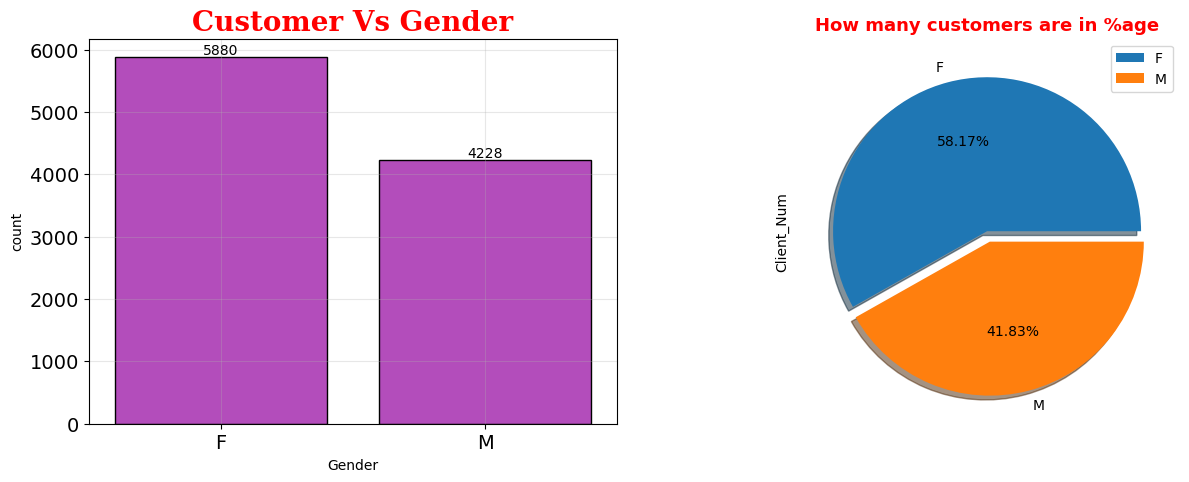

In [21]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax=sns.countplot(x='Gender',data=customer,color='#c33bcd',edgecolor='black',linewidth=1)
ax.bar_label(ax.containers[0])
plt.title('Customer Vs Gender',fontsize=20,fontdict={
    'fontsize': 16,
    'color': 'red',
    'weight': 'bold',
    'family': 'serif' 
})
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14,color='Black')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14,color='black')
plt.grid(True,alpha=0.3)

plt.subplot(1,2,2)
customer.groupby(['Gender'])['Client_Num'].count().plot(kind='pie',autopct='%0.2f%%',shadow=True,explode=[0,0.07])
plt.legend(loc='upper right')
plt.title('How many customers are in %age',fontdict={
    'fontsize':13,
    'color':'red',
    "weight":'bold'})
plt.show()

- **How many customers are which age**

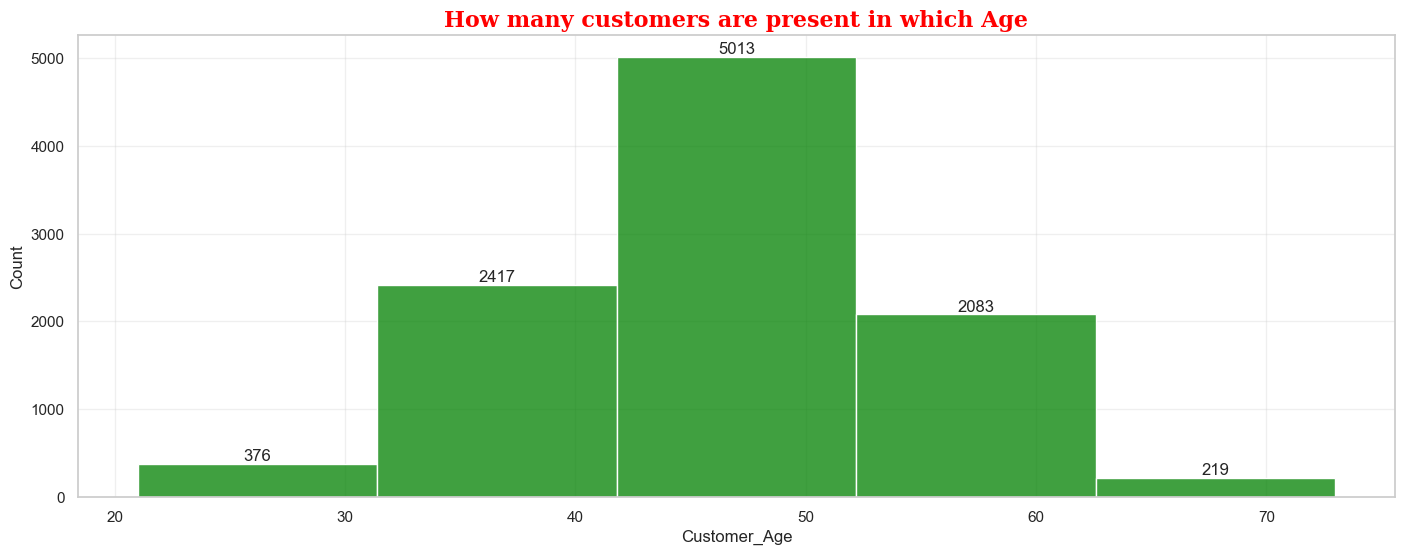

In [22]:
plt.figure(figsize=(17,6))
sns.set(style="whitegrid")
ax=sns.histplot(x='Customer_Age',data=customer,color='green',bins=5)
ax.bar_label(ax.containers[0])
plt.title('How many customers are present in which Age',fontdict={
    'fontsize': 16,
    'color': 'red',
    'weight': 'bold',
    'family': 'serif' 
})
plt.grid(True,alpha=0.3)
plt.show()

- **Customer Distribution of which category ussing by Countplot**

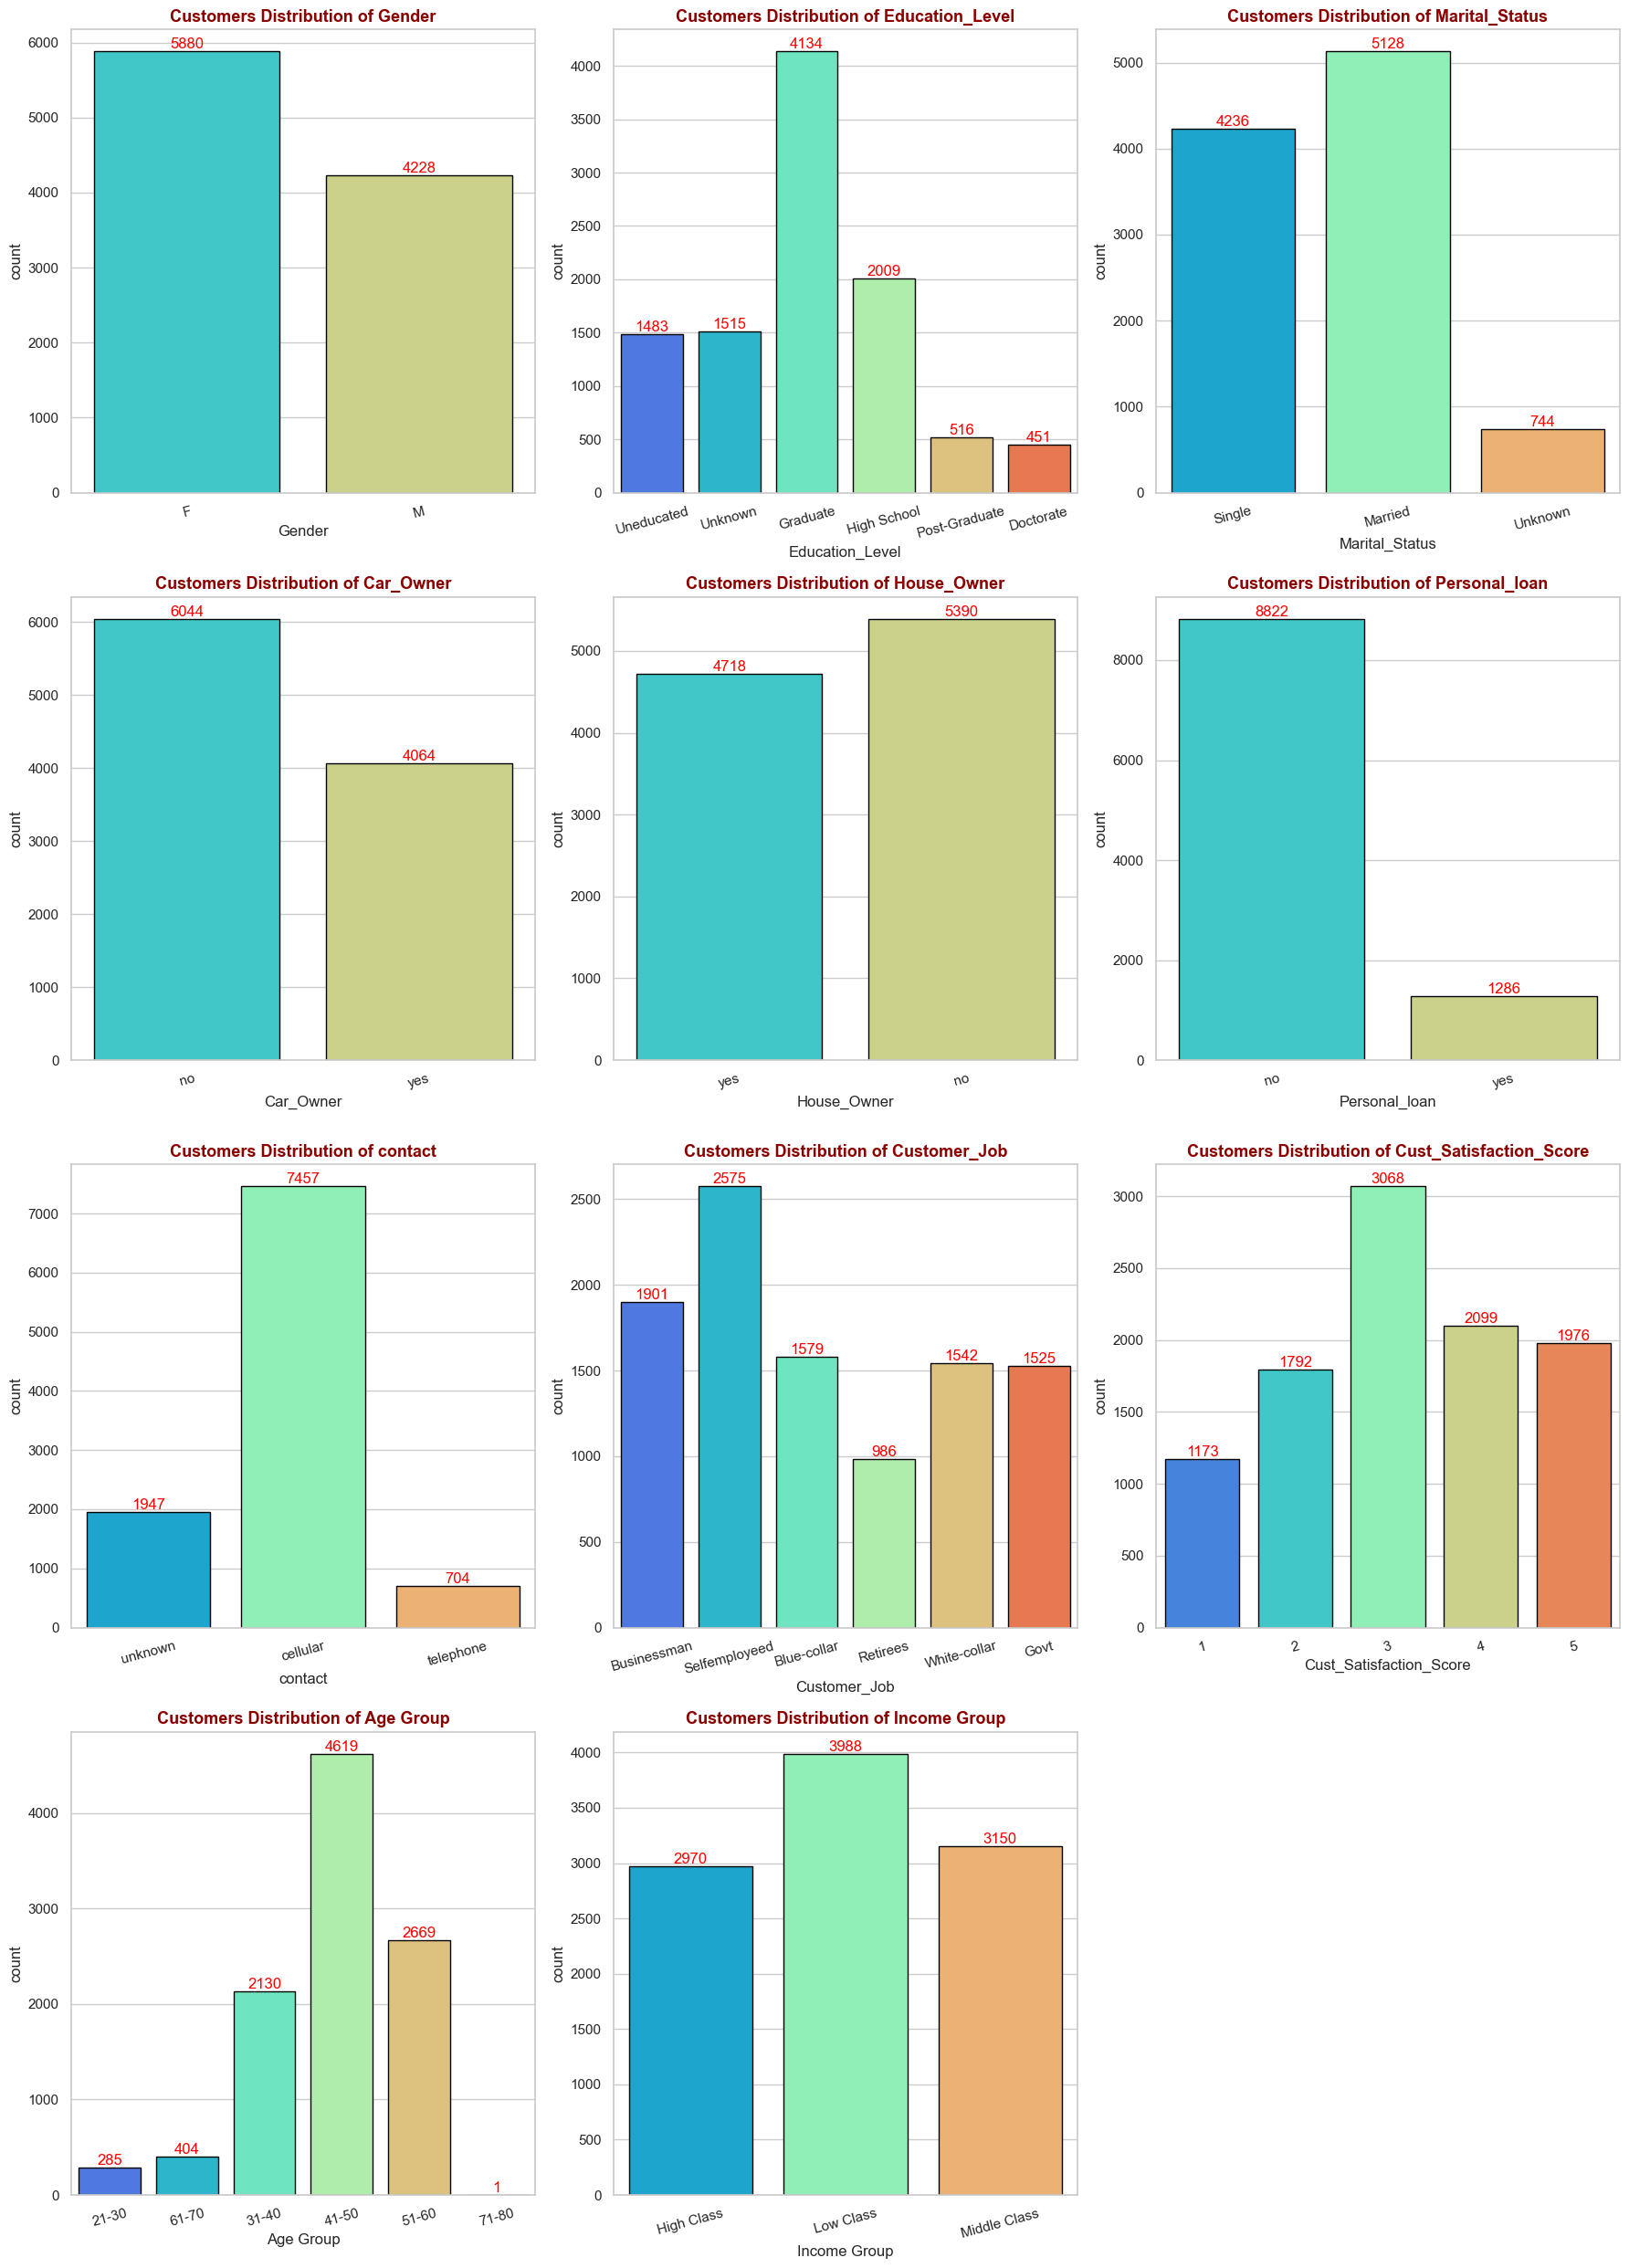

In [23]:
plt.figure(figsize=(18, 25))
sns.set(style="whitegrid")

n_cols = 3
n_rows = (len(Cust_cat_cols) + n_cols - 1) // n_cols

for i, col in enumerate(Cust_cat_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    ax = sns.countplot(x=col, data=customer, palette='rainbow',edgecolor='black')
    
    # Dynamically label all bars safely
    for container in ax.containers:
        ax.bar_label(container, color='red', fontsize=12)

    plt.title(f"Customers Distribution of {col}", fontsize=13,color='darkred',weight='bold')
    plt.xticks(rotation=15)

plt.tight_layout()
plt.show()

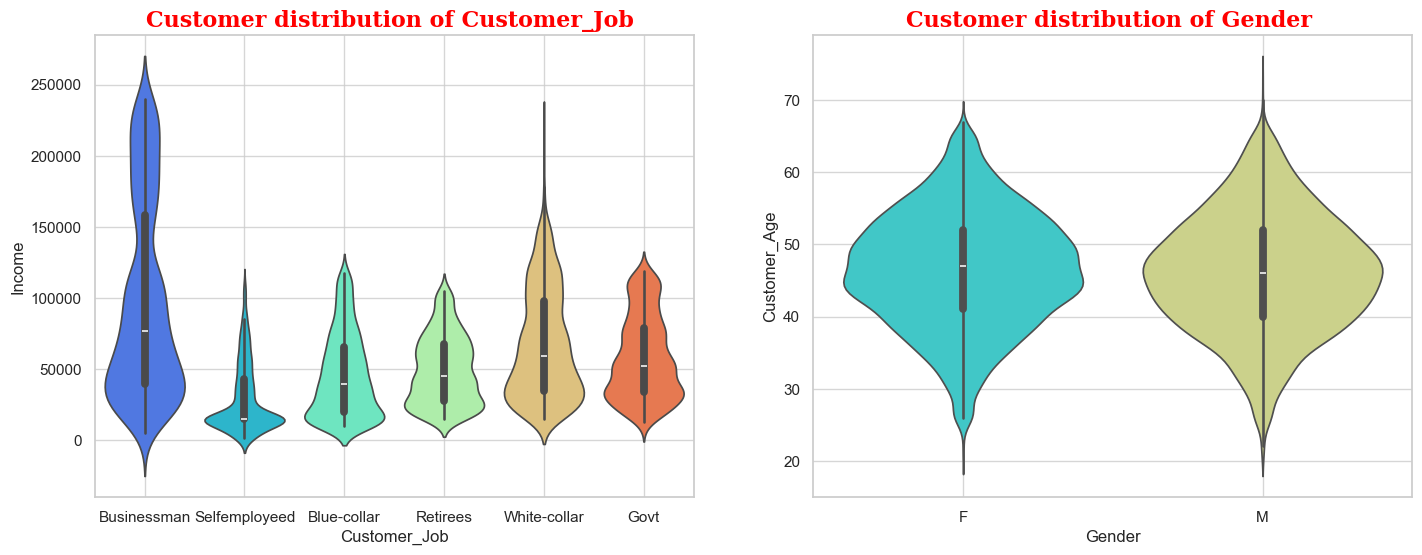

In [24]:
plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
sns.violinplot(x='Customer_Job',y='Income',data=customer,palette='rainbow')
plt.title('Customer distribution of Customer_Job ',fontdict={
    'fontsize': 16,
    'color': 'red',
    'weight': 'bold',
    'family': 'serif' 
})
plt.grid(True,alpha=0.8)

plt.subplot(1,2,2)
sns.violinplot(x='Gender',y='Customer_Age',data=customer,palette='rainbow')
plt.title('Customer distribution of Gender ',fontdict={
    'fontsize': 16,
    'color': 'red',
    'weight': 'bold',
    'family': 'serif' 
})
plt.grid(True,alpha=0.8)
plt.show()

- **Find a relationship between each & every features**

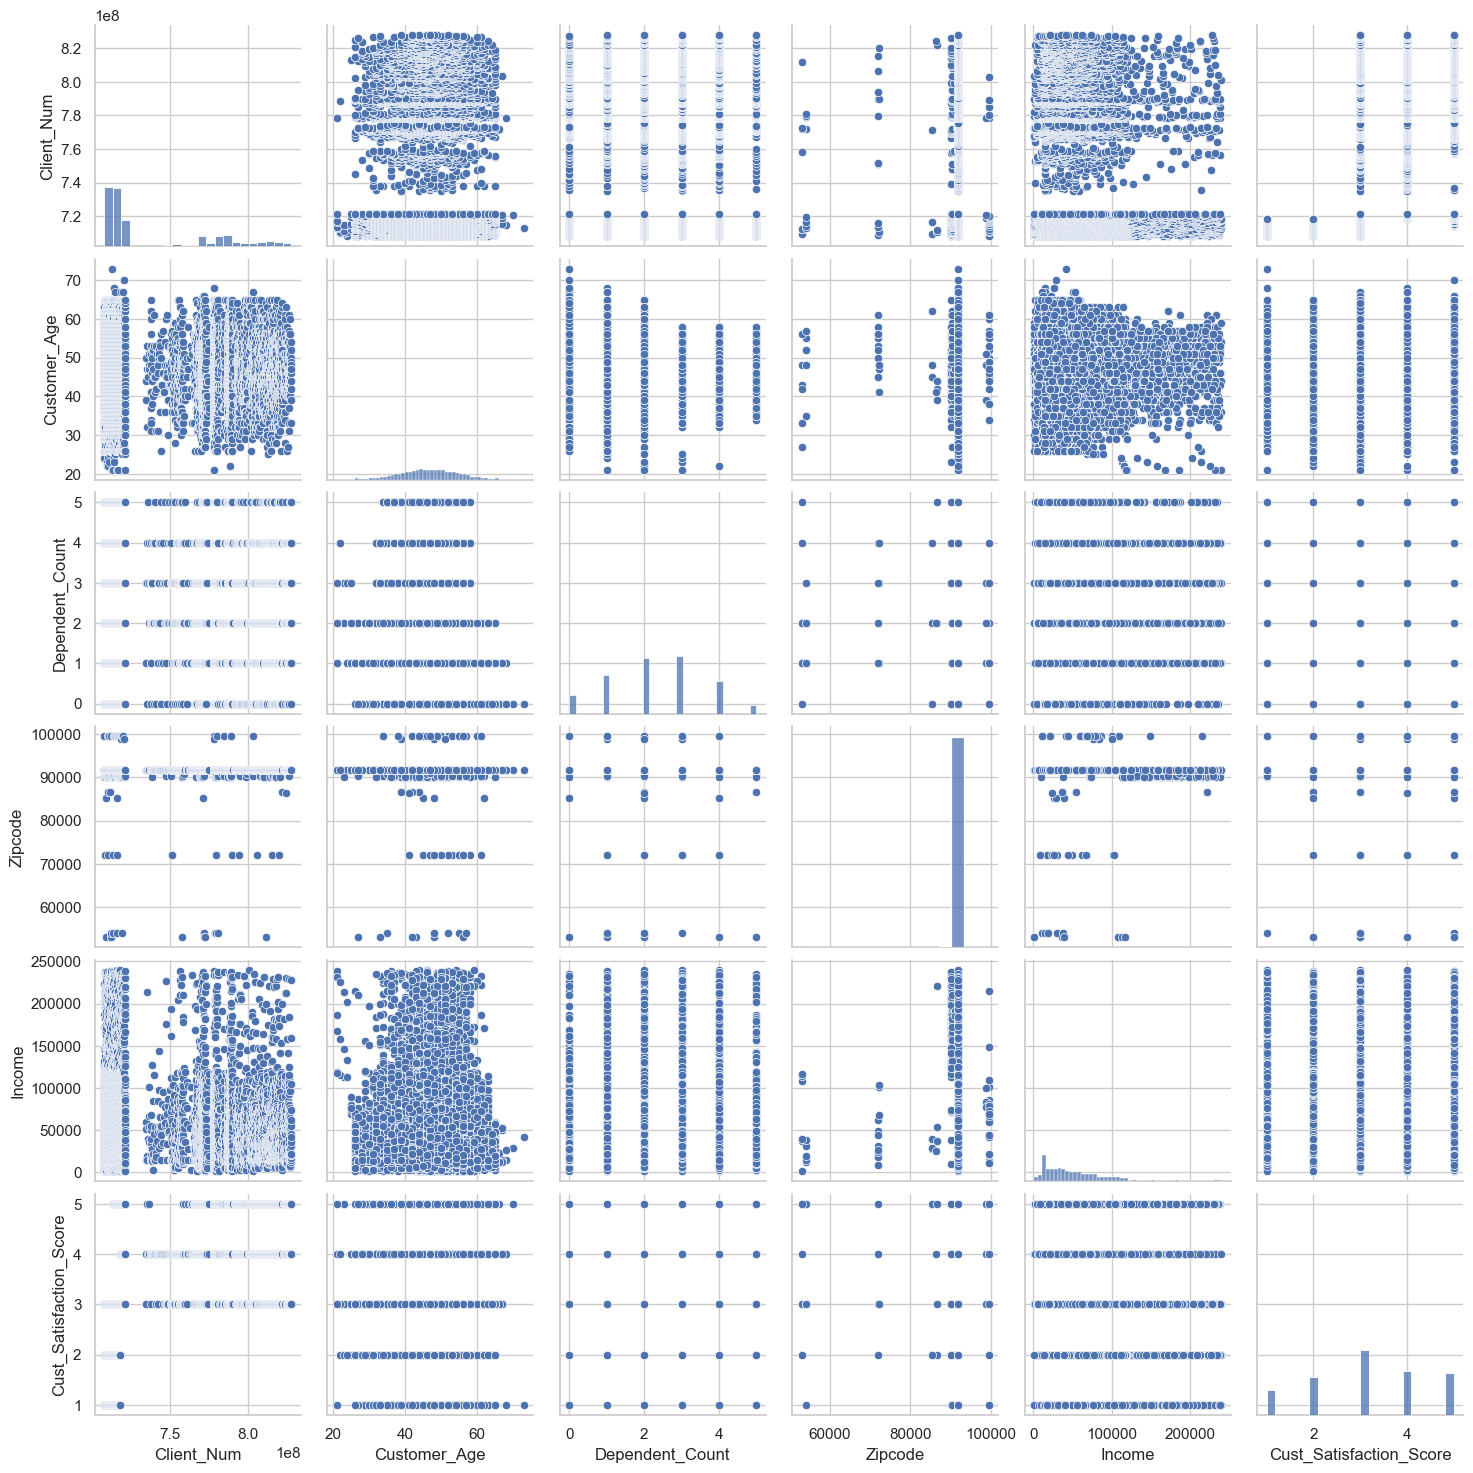

In [25]:
sns.pairplot(data=customer)
plt.show()

## Which Customer Job columns has personal loan or not

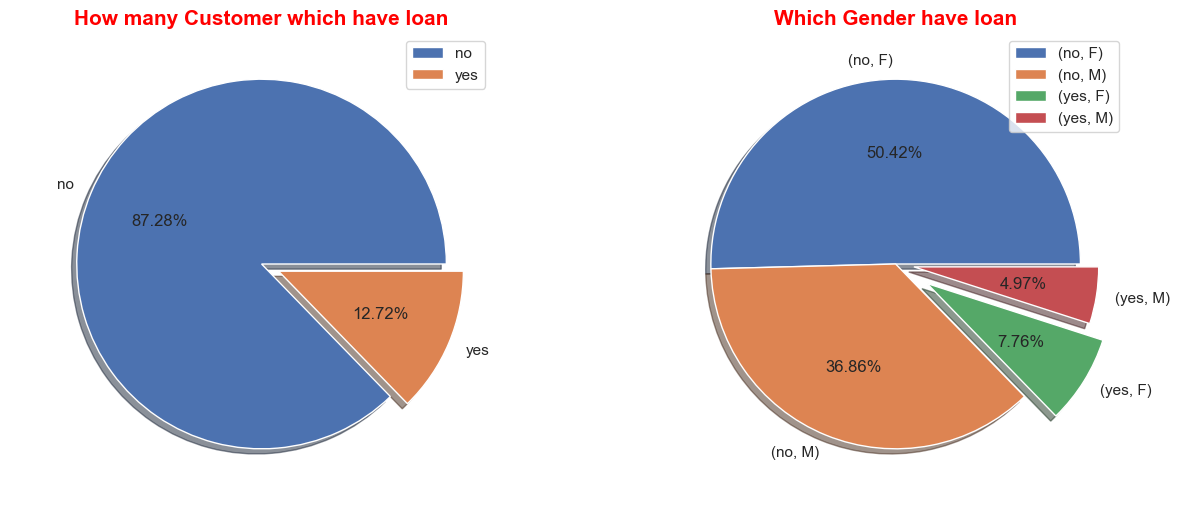

In [26]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)  
customer.value_counts('Personal_loan').plot(kind='pie',autopct='%0.2f%%',shadow=True,explode=[0,0.1])
plt.title('How many Customer which have loan',color='red',fontsize=15,weight='bold')
plt.legend(loc='upper right')
plt.ylabel(' ')

plt.subplot(1,2,2)
customer.groupby(['Personal_loan','Gender'])['Client_Num'].count().plot(kind='pie',autopct='%0.2f%%',shadow=True,explode=[0,0,0.2,0.1])
plt.title('Which Gender have loan',color='red',fontsize=15,weight='bold')
plt.legend(loc='upper right')
plt.ylabel(' ')

plt.show()

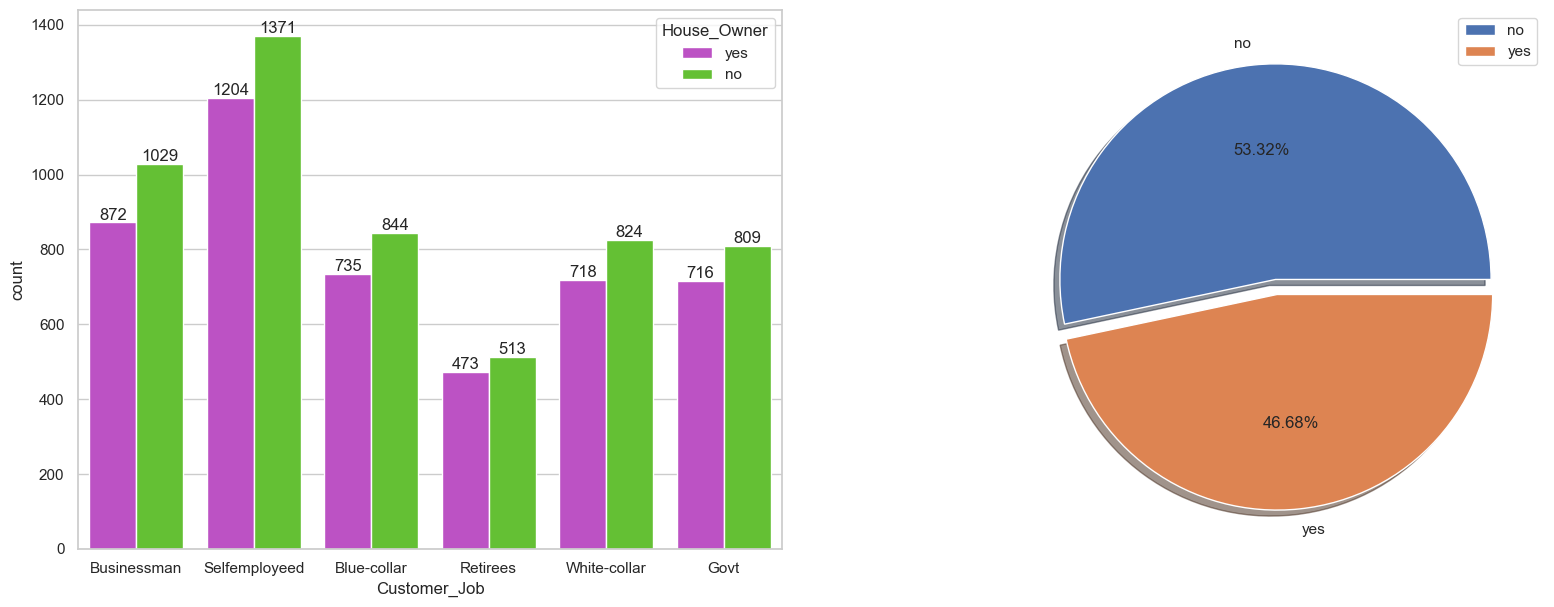

In [27]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
ax=sns.countplot(x='Customer_Job',hue='House_Owner',data=customer,palette={'yes':'#cc3fd7','no':'#5dd81c'})
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.subplot(1,2,2)
customer.groupby(['House_Owner'])['Client_Num'].count().plot(kind='pie',autopct='%0.2f%%',shadow=True,explode=[0,0.07])
plt.legend(loc='upper right')
plt.ylabel(' ')
plt.show()

####

## 2.) Data Exploatary Analysis(EDA) for Customer DataFrame

### 1.) Data Cleaning

In [28]:
##change object data type into date time datatype
card['Week_Start_Date']= pd.to_datetime(card['Week_Start_Date'],format="%d-%m-%Y")

## Extract Month, year & date
card['Month']=card['Week_Start_Date'].dt.month
card['Year']= card['Week_Start_Date'].dt.year

- **Create a Total revenue Columns**

In [29]:
card['Total_Revenue']= card['Annual_Fees']+ card['Total_Revolving_Bal']+ card['Total_Trans_Amt']+ card['Interest_Earned']+ card['Total_Trans_Vol']

In [30]:
## To display al columns
pd.set_option("display.max_columns", None)

In [31]:
card.head()

Client_Num Card_Category  Annual_Fees  Activation_30_Days  \
0   708082083          Blue          200                   0   
1   708083283          Blue          445                   1   
2   708084558          Blue          140                   0   
3   708085458          Blue          250                   1   
4   708086958          Blue          320                   1   

   Customer_Acq_Cost Week_Start_Date Week_Num Qtr  current_year  Credit_Limit  \
0                 87      2023-01-01   Week-1  Q1          2023        3544.0   
1                108      2023-01-01   Week-1  Q1          2023        3421.0   
2                106      2023-01-01   Week-1  Q1          2023        8258.0   
3                150      2023-01-01   Week-1  Q1          2023        1438.3   
4                106      2023-01-01   Week-1  Q1          2023        3128.0   

   Total_Revolving_Bal  Total_Trans_Amt  Total_Trans_Vol  \
0                 1661            15149              111   
1                 2517              992               21   
2                 1771             1447               23   
3                    0             3940               82   
4                  749             4369               59   

   Avg_Utilization_Ratio Use Chip       Exp Type  Interest_Earned  \
0                  0.469    Chip          Travel          4393.21   
1                  0.736   Swipe   Entertainment            69.44   
2                  0.214    Chip           Bills           202.58   
3                  0.000  Online         Grocery           236.40   
4                  0.239   Swipe            Fuel          1004.87   

   Delinquent_Acc  Month  Year  Total_Revenue  
0               0      1  2023       21514.21  
1               0      1  2023        4044.44  
2               0      1  2023        3583.58  
3               0      1  2023        4508.40  
4               1      1  2023        6501.87

- **Printing the unique values in all the columns**

In [32]:
card_cat_cols= ['Card_Category','Qtr','Use Chip','Exp Type']
for i in card_cat_cols:
    print(i,card[i].unique())
    print('-'*50)

Card_Category ['Blue' 'Platinum' 'Silver' 'Gold']
--------------------------------------------------
Qtr ['Q1' 'Q2' 'Q3' 'Q4']
--------------------------------------------------
Use Chip ['Chip ' 'Swipe ' 'Online ']
--------------------------------------------------
Exp Type ['Travel' 'Entertainment' 'Bills' 'Grocery' 'Fuel' 'Food']
--------------------------------------------------


### 2.) Visulization for Card dataframe

### 1.) Find & plot All KPI`s**

In [33]:
print('Sum of Total Revenue is:',round(card['Total_Revenue'].sum(),2))
print('-'*50)
print('Sum of Total_Trans_Amt is:',round(card['Total_Trans_Amt'].sum(),2))
print('-'*50)
print('Sum of Total Interest_Earned :',round(card['Interest_Earned'].sum(),2))
print('-'*50)
print('Sum of Total Annual_Fees :',round(card['Annual_Fees'].sum(),2))
print('-'*50)
print('How many are customers is:',round(card['Client_Num'].count()))

Sum of Total Revenue is: 67724564.23
--------------------------------------------------
Sum of Total_Trans_Amt is: 44522013
--------------------------------------------------
Sum of Total Interest_Earned : 7843382.23
--------------------------------------------------
Sum of Total Annual_Fees : 2950015
--------------------------------------------------
How many are customers is: 10108


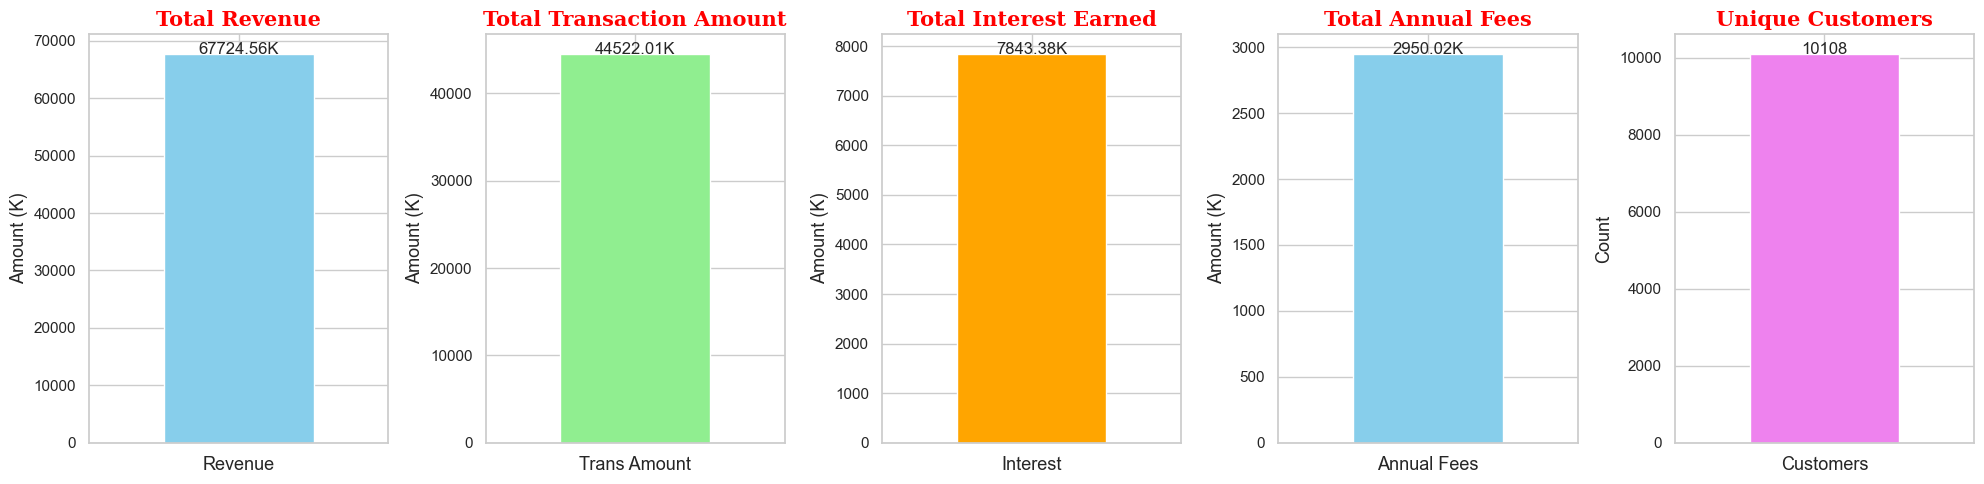

In [34]:
# KPI Calculations
total_revenue_k = round(card['Total_Revenue'].sum() / 1000, 2)
total_trans_amnt_k = round(card['Total_Trans_Amt'].sum() / 1000, 2)
total_interest_earned = round(card['Interest_Earned'].sum() / 1000, 2)
total_annual_fee = round(card['Annual_Fees'].sum() / 1000, 2)
total_customer = card['Client_Num'].nunique()
# Plot Setup
plt.figure(figsize=(20, 5))  # Increase width for 5 plots

# Total Revenue
plt.subplot(1, 5, 1)
pd.Series([total_revenue_k], index=['Revenue']).plot(kind='bar', color='skyblue')
plt.ylabel('Amount (K)', fontsize=13)
plt.title('Total Revenue', fontsize=15, weight='bold', family='serif', color='red')
plt.xticks(rotation=0, fontsize=13)
plt.text(0, total_revenue_k + 1, f'{total_revenue_k}K', ha='center', fontsize=12)

# Total Transaction Amount
plt.subplot(1, 5, 2)
pd.Series([total_trans_amnt_k], index=['Trans Amount']).plot(kind='bar', color='lightgreen')
plt.ylabel('Amount (K)', fontsize=13)
plt.title('Total Transaction Amount', fontsize=15, weight='bold', family='serif', color='red')
plt.xticks(rotation=0, fontsize=13)
plt.text(0, total_trans_amnt_k + 1, f'{total_trans_amnt_k}K', ha='center', fontsize=12)

# Total Interest Earned
plt.subplot(1, 5, 3)
pd.Series([total_interest_earned], index=['Interest']).plot(kind='bar', color='orange')
plt.ylabel('Amount (K)', fontsize=13)
plt.title('Total Interest Earned', fontsize=15, weight='bold', family='serif', color='red')
plt.xticks(rotation=0, fontsize=13)
plt.text(0, total_interest_earned + 1, f'{total_interest_earned}K', ha='center', fontsize=12)

# Total Annual Fees
plt.subplot(1, 5, 4)
pd.Series([total_annual_fee], index=['Annual Fees']).plot(kind='bar', color='skyblue')
plt.ylabel('Amount (K)', fontsize=13)
plt.title('Total Annual Fees', fontsize=15, weight='bold', family='serif', color='red')
plt.xticks(rotation=0, fontsize=13)
plt.text(0, total_annual_fee + 1, f'{total_annual_fee}K', ha='center', fontsize=12)

# Unique Customers
plt.subplot(1, 5, 5)
pd.Series([total_customer], index=['Customers']).plot(kind='bar', color='violet')
plt.ylabel('Count', fontsize=13)
plt.title('Unique Customers', fontsize=15, weight='bold', family='serif', color='red')
plt.xticks(rotation=0, fontsize=13)
plt.text(0, total_customer + 1, f'{total_customer}', ha='center', fontsize=12)

# Layout
plt.tight_layout()
plt.show()

- **Monthly wise Total Revenue**

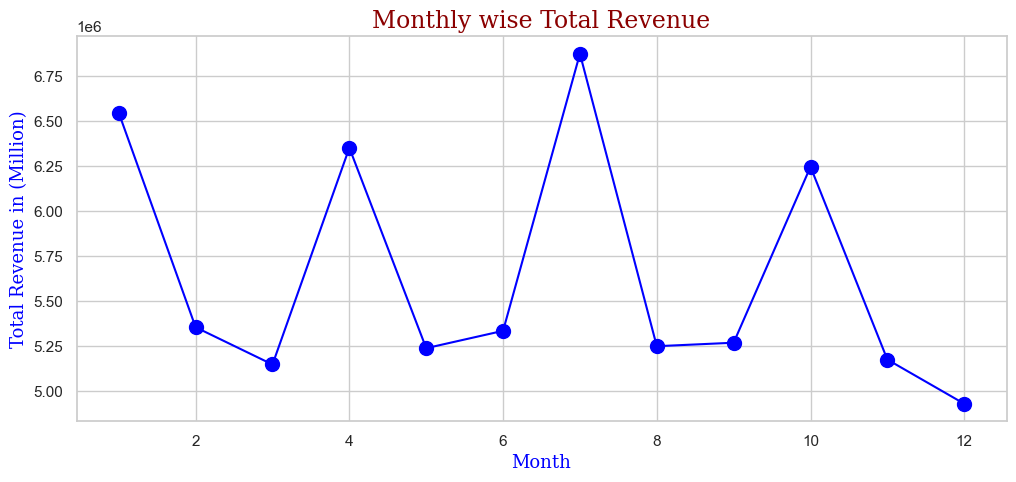

In [35]:
plt.figure(figsize=(12, 5))
card.groupby('Month')['Total_Revenue'] \
    .sum() \
    .plot(marker='o',color='blue',markersize=10)  
plt.title('Monthly wise Total Revenue',color='darkred',fontsize=17,family='serif')
plt.xlabel('Month',color='blue',fontsize=13,family='serif')
plt.ylabel('Total Revenue in (Million)',color='blue',fontsize=13,family='serif')
plt.grid(True)
plt.show()

- **find Total_Revenue**

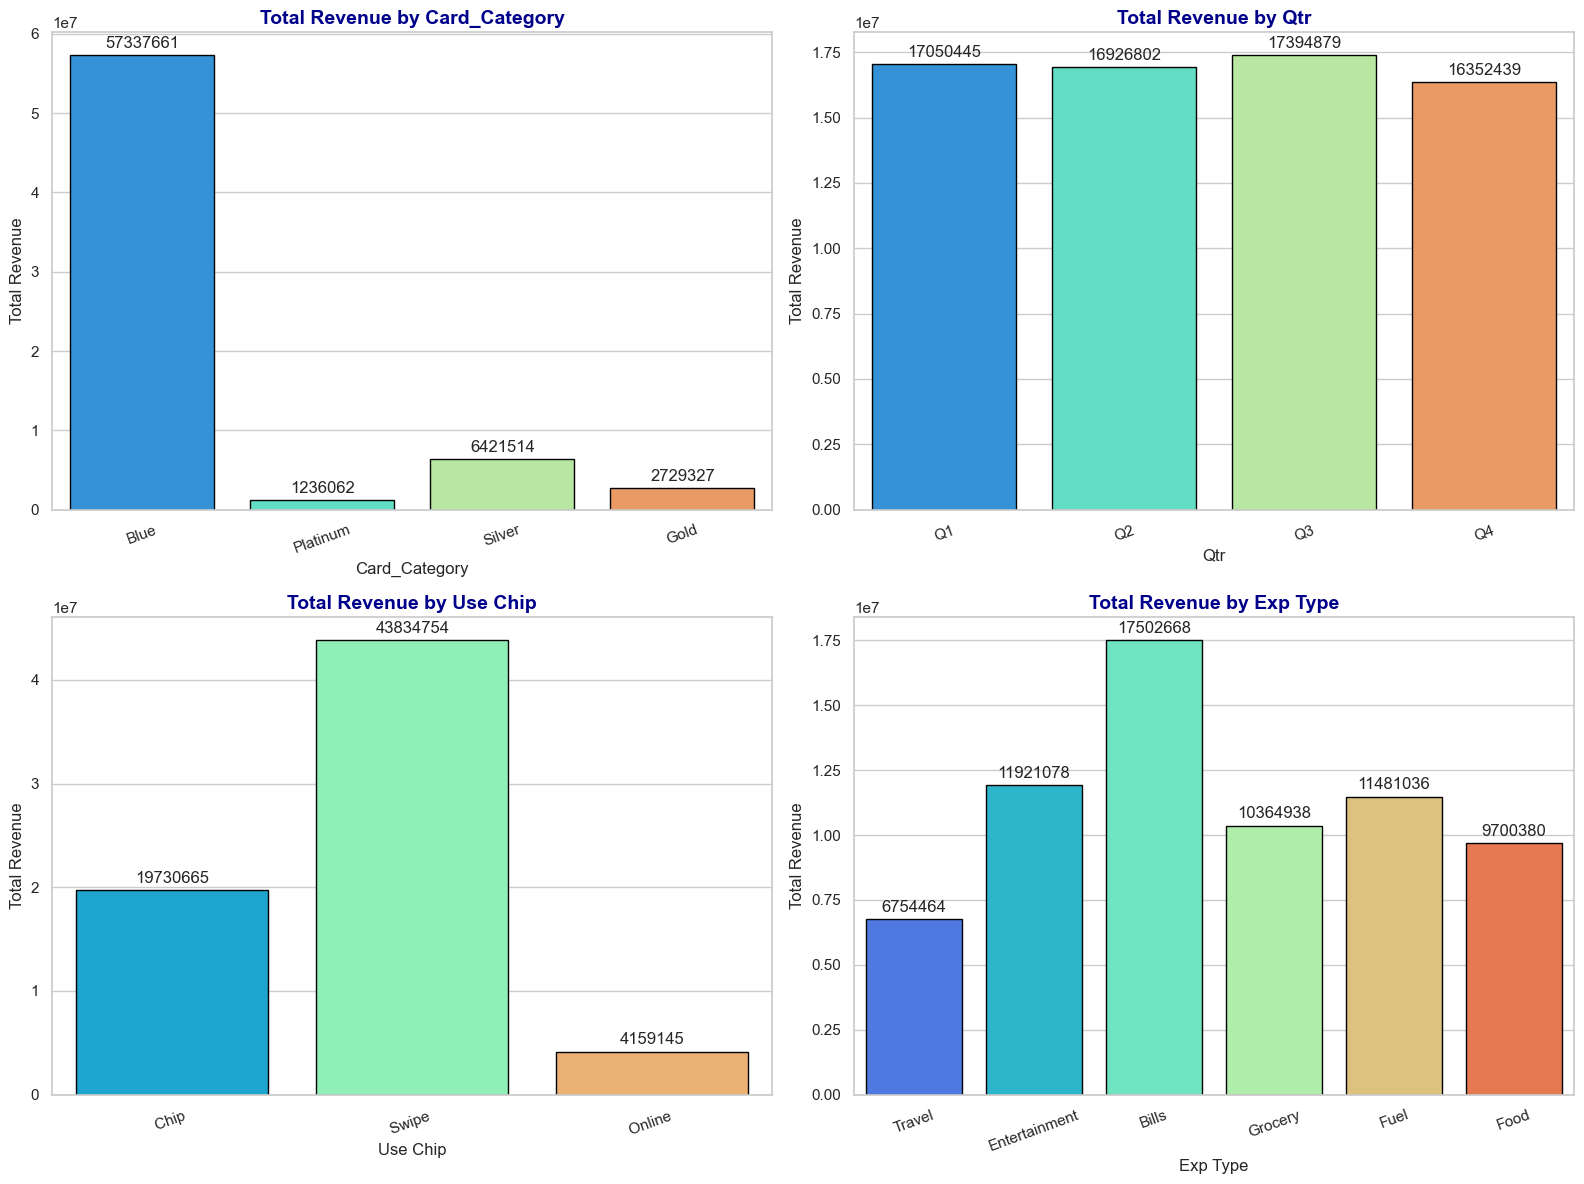

In [36]:
card_cat_cols = ['Card_Category', 'Qtr', 'Use Chip', 'Exp Type']
sns.set_style("whitegrid")
n_cols = 2
n_rows = (len(card_cat_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 12), squeeze=False)
axes = axes.flatten()

for ax, col in zip(axes, card_cat_cols):
    sns.barplot(
        data=card,
        x=col,
        y='Total_Revenue',
        estimator=sum,
        ci=None,
        palette='rainbow',
        edgecolor='black',
        ax=ax
    )
    ax.set_title(f"Total Revenue by {col}", fontsize=14, color='darkblue', weight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('Total Revenue')
    for container in ax.containers:  # adds labels on bars
        ax.bar_label(container, fmt='%.0f', padding=3)
    ax.tick_params(axis='x', rotation=20,color='red')

for ax in axes[len(card_cat_cols):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

####

## Total Revenue Vs Exp_Type Vs Card_Category

In [37]:
gb5= card.groupby(['Card_Category','Exp Type'])['Total_Revenue'].sum().reset_index()
gb5

Card_Category       Exp Type  Total_Revenue
0           Blue          Bills    14970444.23
1           Blue  Entertainment    10660068.53
2           Blue           Food     8176735.49
3           Blue           Fuel    10319549.06
4           Blue        Grocery     8985755.42
5           Blue         Travel     4225108.01
6           Gold          Bills      532496.26
7           Gold  Entertainment      352238.52
8           Gold           Food      401515.79
9           Gold           Fuel      345677.68
10          Gold        Grocery      316190.89
11          Gold         Travel      781208.02
12      Platinum          Bills      235889.76
13      Platinum  Entertainment      127001.06
14      Platinum           Food      235054.69
15      Platinum           Fuel      105203.35
16      Platinum        Grocery      177385.66
17      Platinum         Travel      355527.53
18        Silver          Bills     1763837.40
19        Silver  Entertainment      781770.36
20        Silver           Food      887074.44
21        Silver           Fuel      710605.64
22        Silver        Grocery      885606.27
23        Silver         Travel     1392620.17

In [38]:
fig = px.bar(
    gb5,
    x='Card_Category',
    y='Total_Revenue',
    color='Exp Type',
    barmode='group',
    text='Total_Revenue')
fig.update_layout(
    title_text='Total Revenue by Card Category and Expense Type',
    title_font=dict(size=22, color='darkblue'),
    xaxis_title='Card Category',
    yaxis_title='Total Revenue',
    legend_title='Expense Type',
    xaxis_tickangle=0,
    width=1000,  
    height=600 )  
fig.show()

- **Total_revenue wise Qtr.**

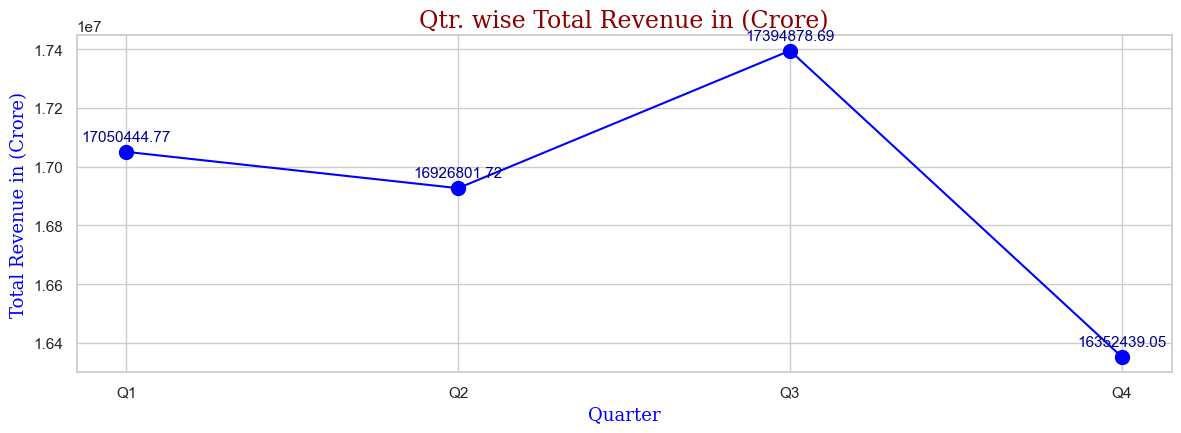

In [39]:
quarterly = card.groupby('Qtr')['Total_Revenue'].sum()

plt.figure(figsize=(12, 4.5))
plt.plot(quarterly.index, quarterly.values,
         marker='o', color='blue', markersize=10)

for x, y in zip(quarterly.index, quarterly.values):
    plt.annotate(f'{y:.2f}',
                 (x, y),
                 textcoords="offset points",
                 xytext=(0, 8),  
                 ha='center',
                 color='darkblue', fontsize=11)

plt.title('Qtr. wise Total Revenue in (Crore)',
          color='darkred', fontsize=17, family='serif')
plt.xlabel('Quarter', color='blue', fontsize=13, family='serif')
plt.ylabel('Total Revenue in (Crore)',
           color='blue', fontsize=13, family='serif')
plt.grid(True)
plt.tight_layout()
plt.show()

###

In [40]:
pivot1= card.pivot_table(values='Total_Revenue',columns='Exp Type',index='Qtr',aggfunc='sum')
pivot1

Exp Type       Bills  Entertainment        Food        Fuel     Grocery  \
Qtr                                                                       
Q1        4341060.14     2918854.49  2619991.25  2919974.01  2437998.64   
Q2        4361755.98     2828590.09  2530169.80  2785227.22  2547867.21   
Q3        4399786.24     3185966.53  2227456.93  2951716.54  2867191.45   
Q4        4400065.29     2987667.36  2322762.43  2824117.96  2511880.94   

Exp Type      Travel  
Qtr                   
Q1        1812566.24  
Q2        1873191.42  
Q3        1762761.00  
Q4        1305945.07

In [41]:
pivot2= card.pivot_table(values='Total_Revenue',columns='Use Chip',index='Qtr',aggfunc='sum')
pivot2

Use Chip       Chip      Online        Swipe 
Qtr                                          
Q1        5324653.57  1114203.61  10611587.59
Q2        5011029.29   987613.83  10928158.60
Q3        5230214.82  1101103.03  11063560.84
Q4        4164767.52   956224.35  11231447.18

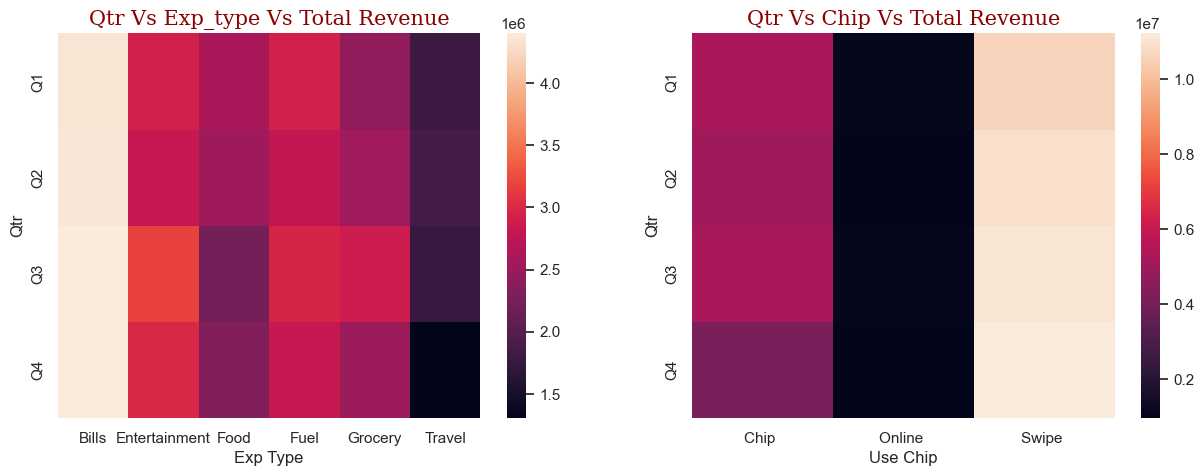

In [42]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.heatmap(pivot1)
plt.title('Qtr Vs Exp_type Vs Total Revenue',color='darkred',fontsize=15,family='serif')

plt.subplot(1,2,2)
sns.heatmap(pivot2)
plt.title('Qtr Vs Chip Vs Total Revenue',color='darkred',fontsize=15,family='serif')
plt.show()

## Use Chip vs Total Revenue

In [43]:
chip= card.groupby(['Use Chip','Exp Type'])['Total_Revenue'].sum().reset_index()
chip

Use Chip       Exp Type  Total_Revenue
0     Chip           Bills     3792085.12
1     Chip   Entertainment     3218565.06
2     Chip            Food     2297132.97
3     Chip            Fuel     3192532.97
4     Chip         Grocery     2596365.35
5     Chip          Travel     4633983.73
6   Online           Bills     1003090.64
7   Online   Entertainment      774977.77
8   Online            Food      604909.03
9   Online            Fuel      632628.31
10  Online         Grocery      575948.10
11  Online          Travel      567590.97
12   Swipe           Bills    12707491.89
13   Swipe   Entertainment     7927535.64
14   Swipe            Food     6798338.41
15   Swipe            Fuel     7655874.45
16   Swipe         Grocery     7192624.79
17   Swipe          Travel     1552889.03

In [44]:
fig = px.bar(
    chip,
    x='Use Chip',
    y='Total_Revenue',
    color='Exp Type',
    barmode='group',
    text='Total_Revenue')
fig.update_layout(
    title_text='Total Revenue by Card Category and Expense Type',
    title_font=dict(size=22, color='darkblue'),
    xaxis_title='Card Chip',
    yaxis_title='Total Revenue',
    legend_title='Expense Type',
    xaxis_tickangle=0,
    width=1100,  
    height=500 )  
fig.show()

## Merge card Dataframe on Customer DataFrame

In [45]:
customer= customer.merge(card[['Card_Category','Use Chip','Exp Type','Interest_Earned','Total_Revenue','Client_Num']],on='Client_Num',how='inner')

In [60]:
customer.head(2)

Client_Num  Customer_Age Gender  Dependent_Count Education_Level  \
0   708082083            24      F                1      Uneducated   
1   708083283            62      F                0         Unknown   

  Marital_Status state_cd  Zipcode Car_Owner House_Owner Personal_loan  \
0         Single       FL    91750        no         yes            no   
1        Married       NJ    91750        no          no            no   

    contact   Customer_Job  Income  Cust_Satisfaction_Score Age Group  \
0   unknown    Businessman  202326                        3     21-30   
1  cellular  Selfemployeed    5225                        2     61-70   

  Income Group Card_Category Use Chip       Exp Type  Interest_Earned  \
0   High Class          Blue    Chip          Travel          4393.21   
1    Low Class          Blue   Swipe   Entertainment            69.44   

   Total_Revenue  
0       21514.21  
1        4044.44

- **Customers Vs Satisfaction_Score**

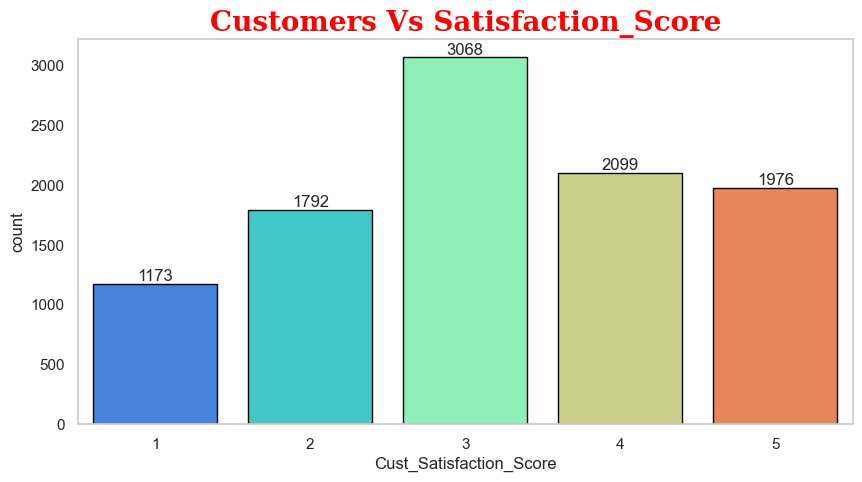

In [59]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x='Cust_Satisfaction_Score',data=customer,palette='rainbow',edgecolor='black')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])
ax.bar_label(ax.containers[4])
plt.title('Customers Vs Satisfaction_Score',fontdict={
    'fontsize':20,
    'color':'red',
    'weight':'bold',
    'family':'serif'})
plt.grid(False)
plt.show()

## Total Revenue Vs Customer_job

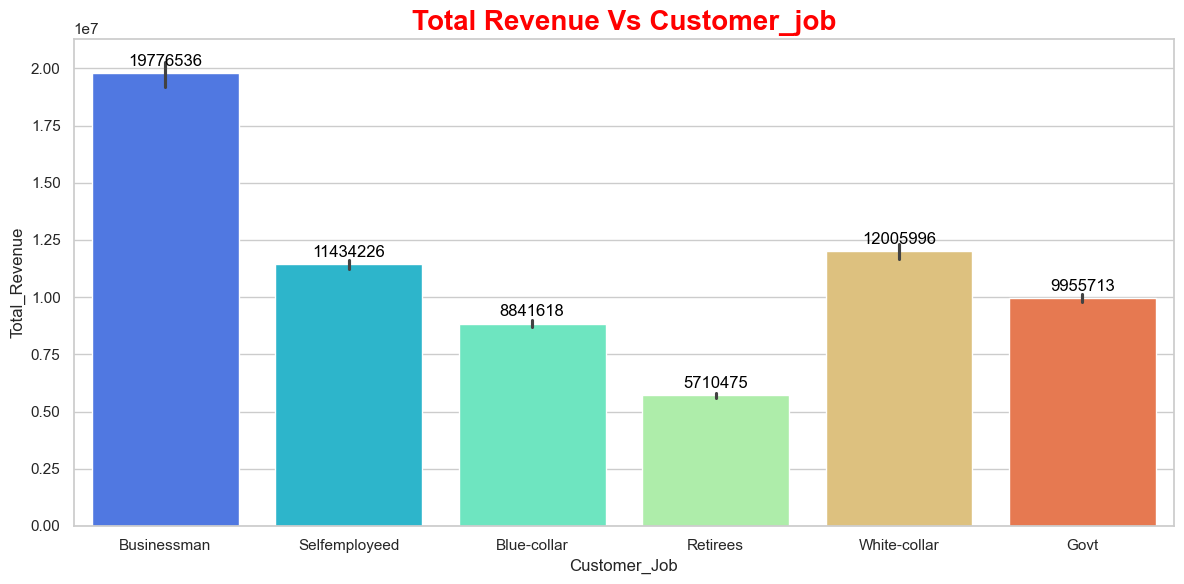

In [71]:
plt.figure(figsize=(12,6))
ax=sns.barplot(x='Customer_Job',y='Total_Revenue',data=customer,estimator='sum',palette='rainbow')
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3, color='black')
plt.title('Total Revenue Vs Customer_job',fontdict={
'fontsize':20,
'color':'red',
'weight':'bold'})
plt.tight_layout()
plt.show()

# Total Revenue Vs Age group

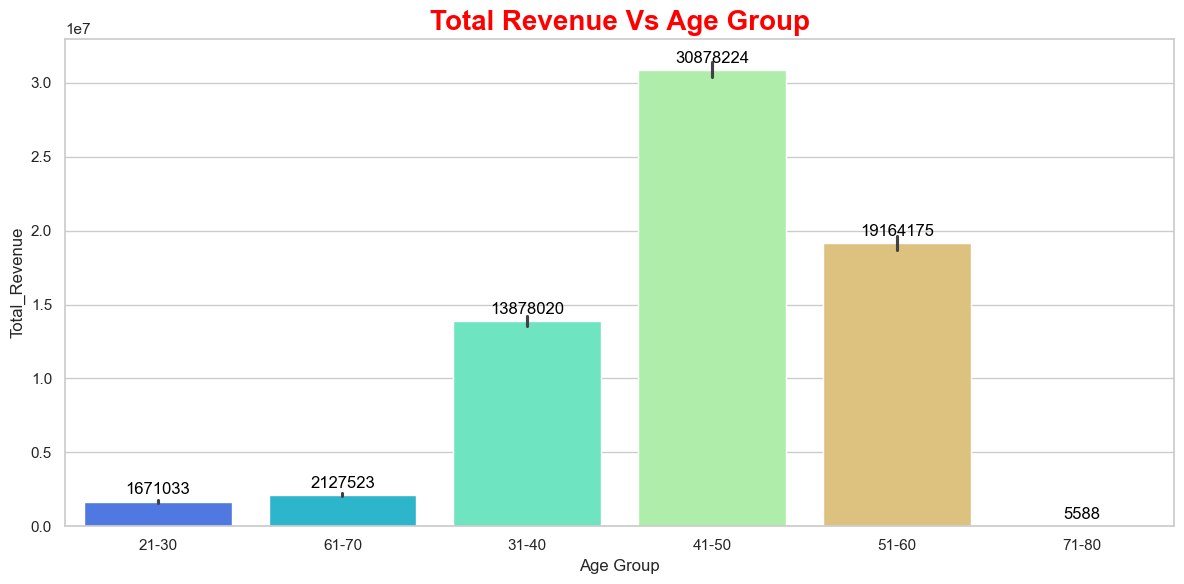

In [70]:
plt.figure(figsize=(12,6))
ax=sns.barplot(x='Age Group',y='Total_Revenue',data=customer,estimator='sum',palette='rainbow')
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3, color='black')
plt.title('Total Revenue Vs Age Group',fontdict={
'fontsize':20,
'color':'red',
'weight':'bold'})
plt.tight_layout()
plt.show()

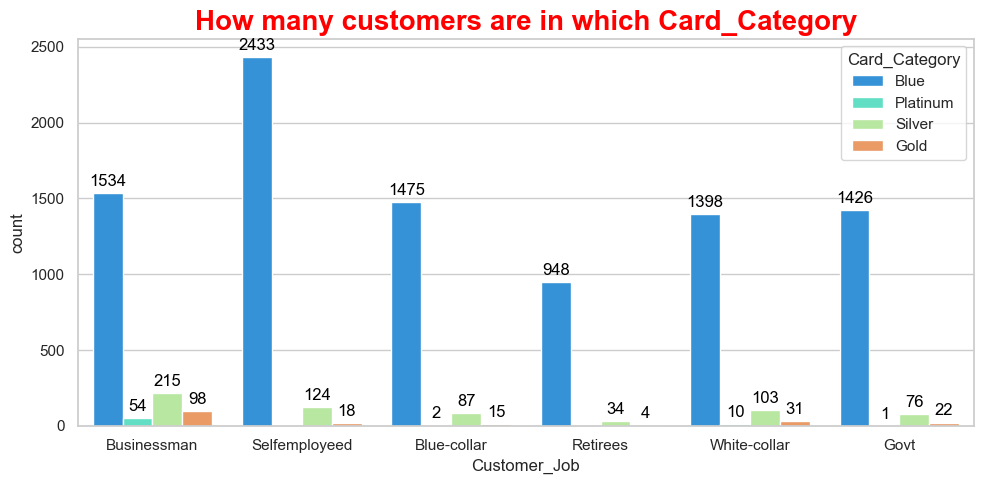

In [89]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='Customer_Job',hue='Card_Category',data=customer,palette='rainbow')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3, color='black')

plt.title('How many customers are in which Card_Category', fontdict={
    'fontsize': 20,
    'color': 'red',
    'weight': 'bold'
})
plt.tight_layout()
plt.show()

# Find Outliers

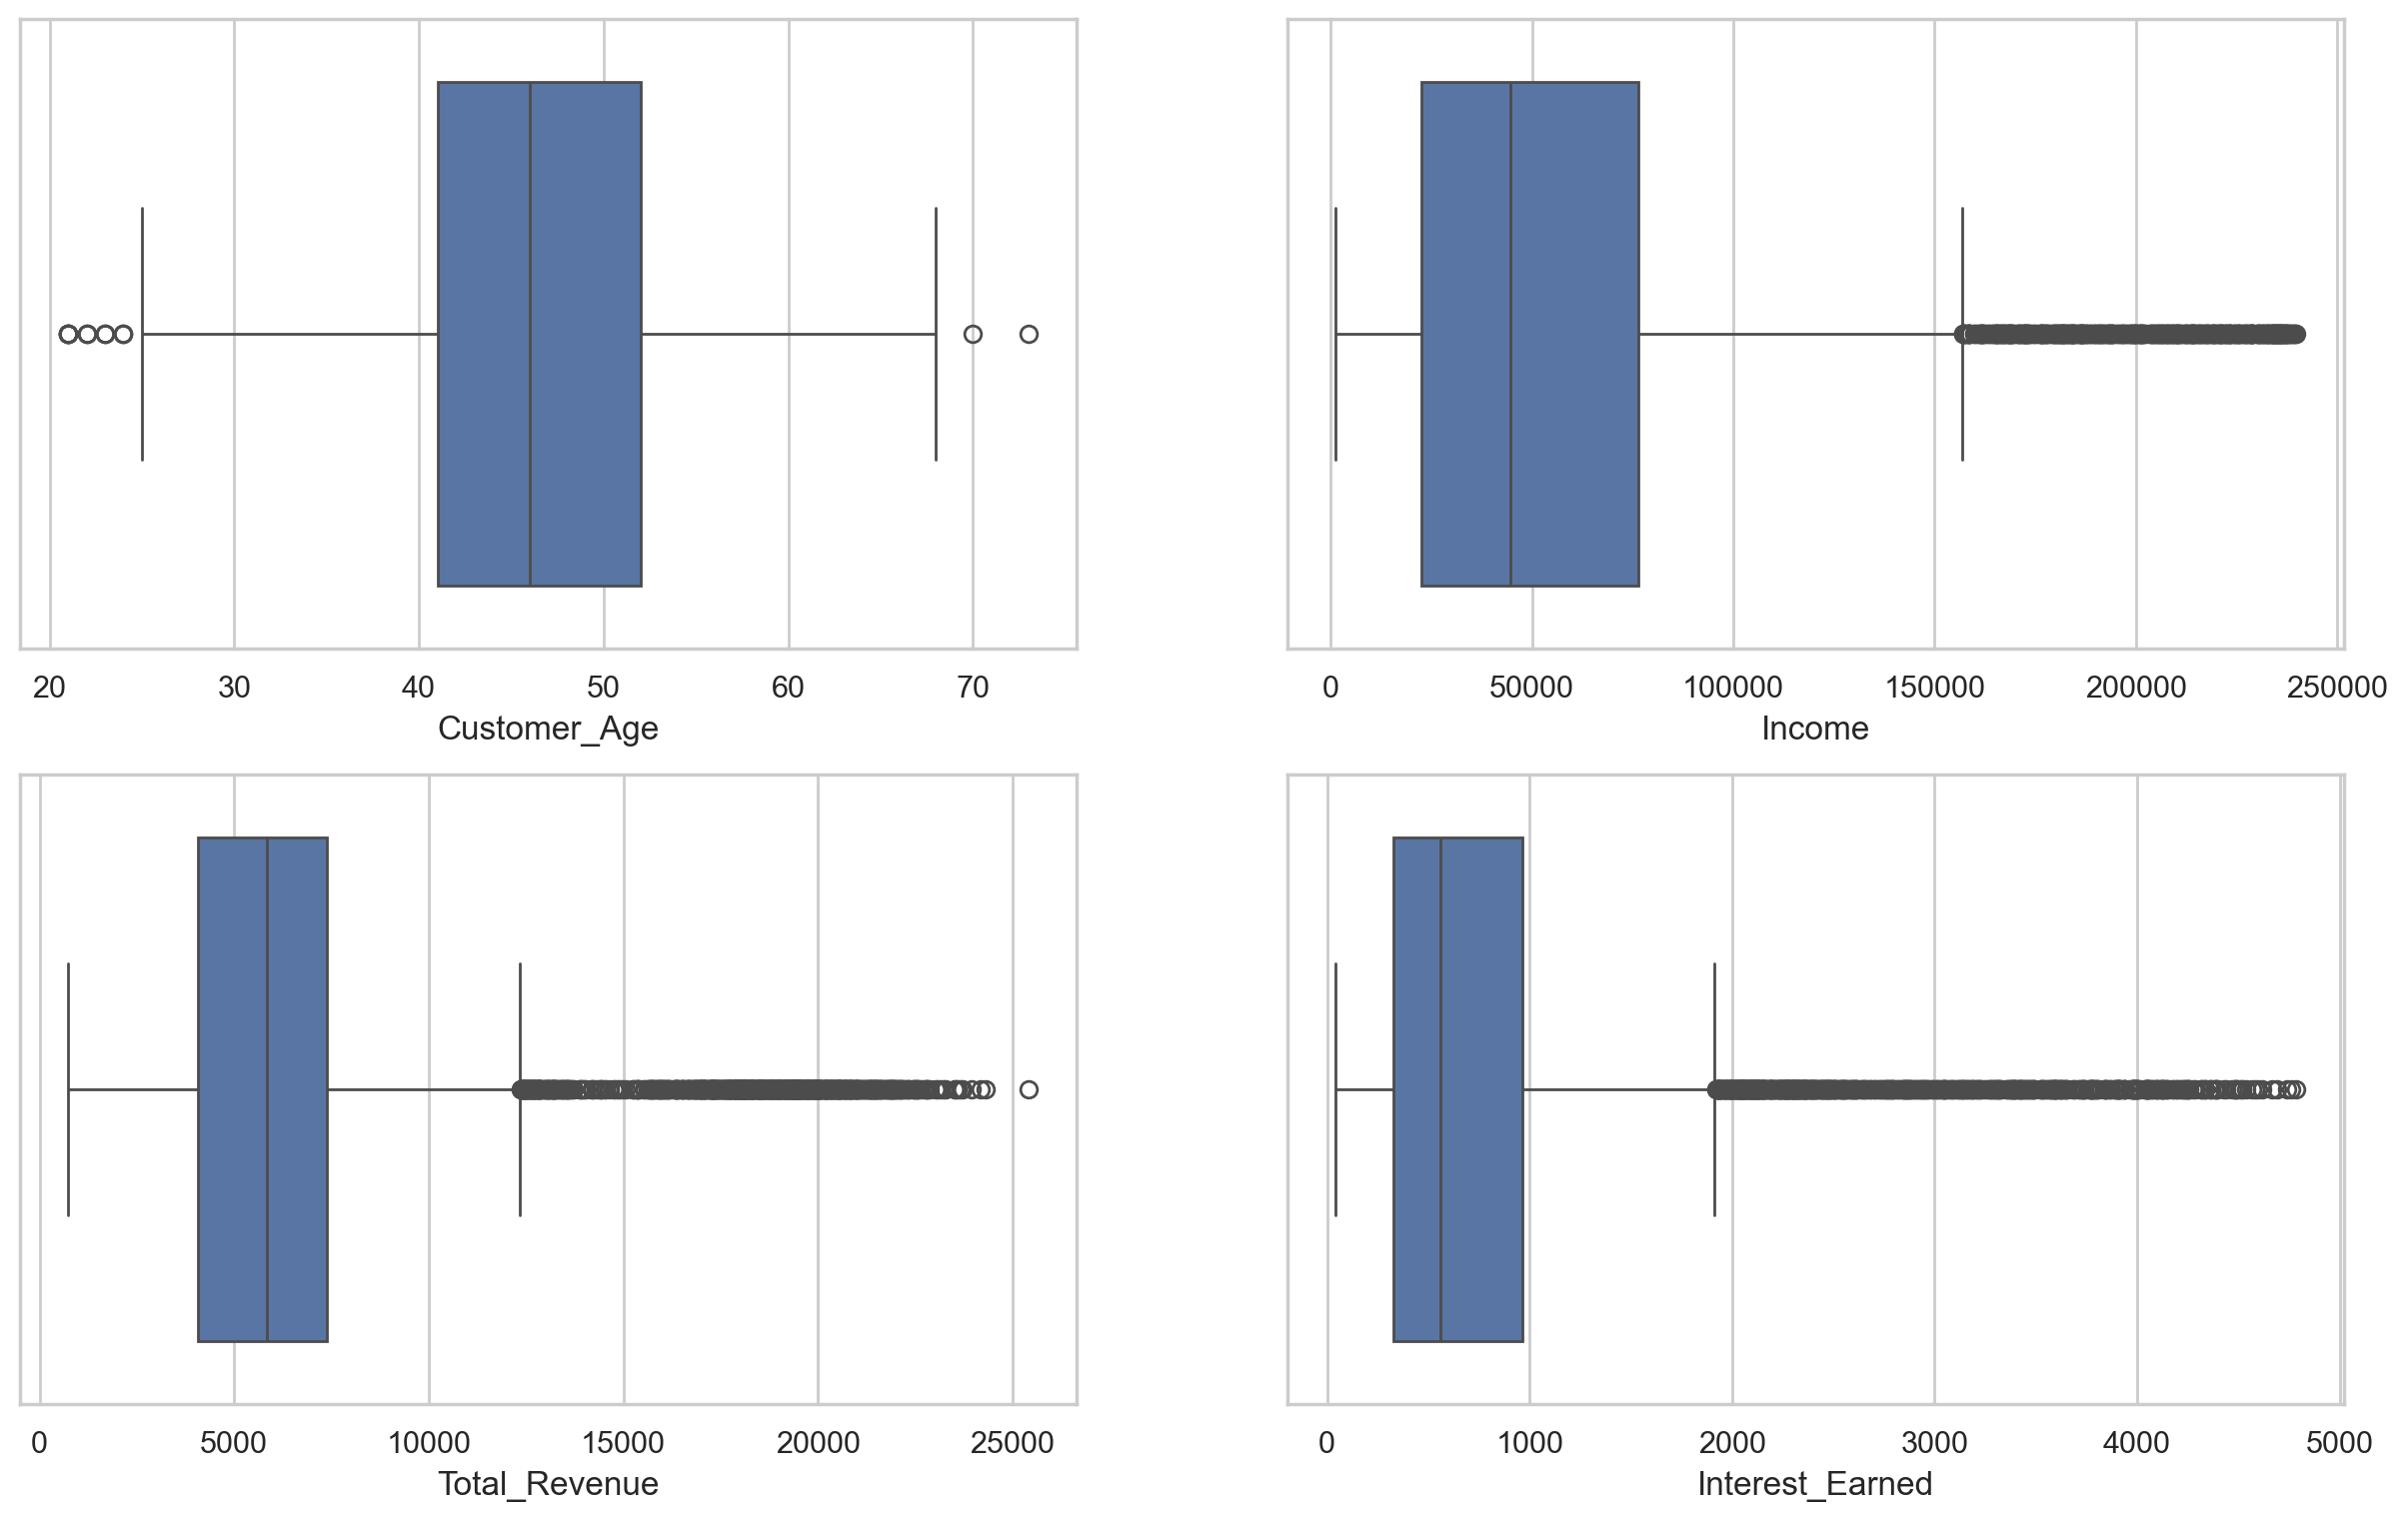

In [68]:
plt.figure(figsize=(15,9),dpi=200)
plt.subplot(2,2,1)
sns.boxplot(x='Customer_Age',data=customer)

plt.subplot(2,2,2)
sns.boxplot(x='Income',data=customer)

plt.subplot(2,2,3)
sns.boxplot(x='Total_Revenue',data=customer)

plt.subplot(2,2,4)
sns.boxplot(x='Interest_Earned',data=customer)
plt.show()

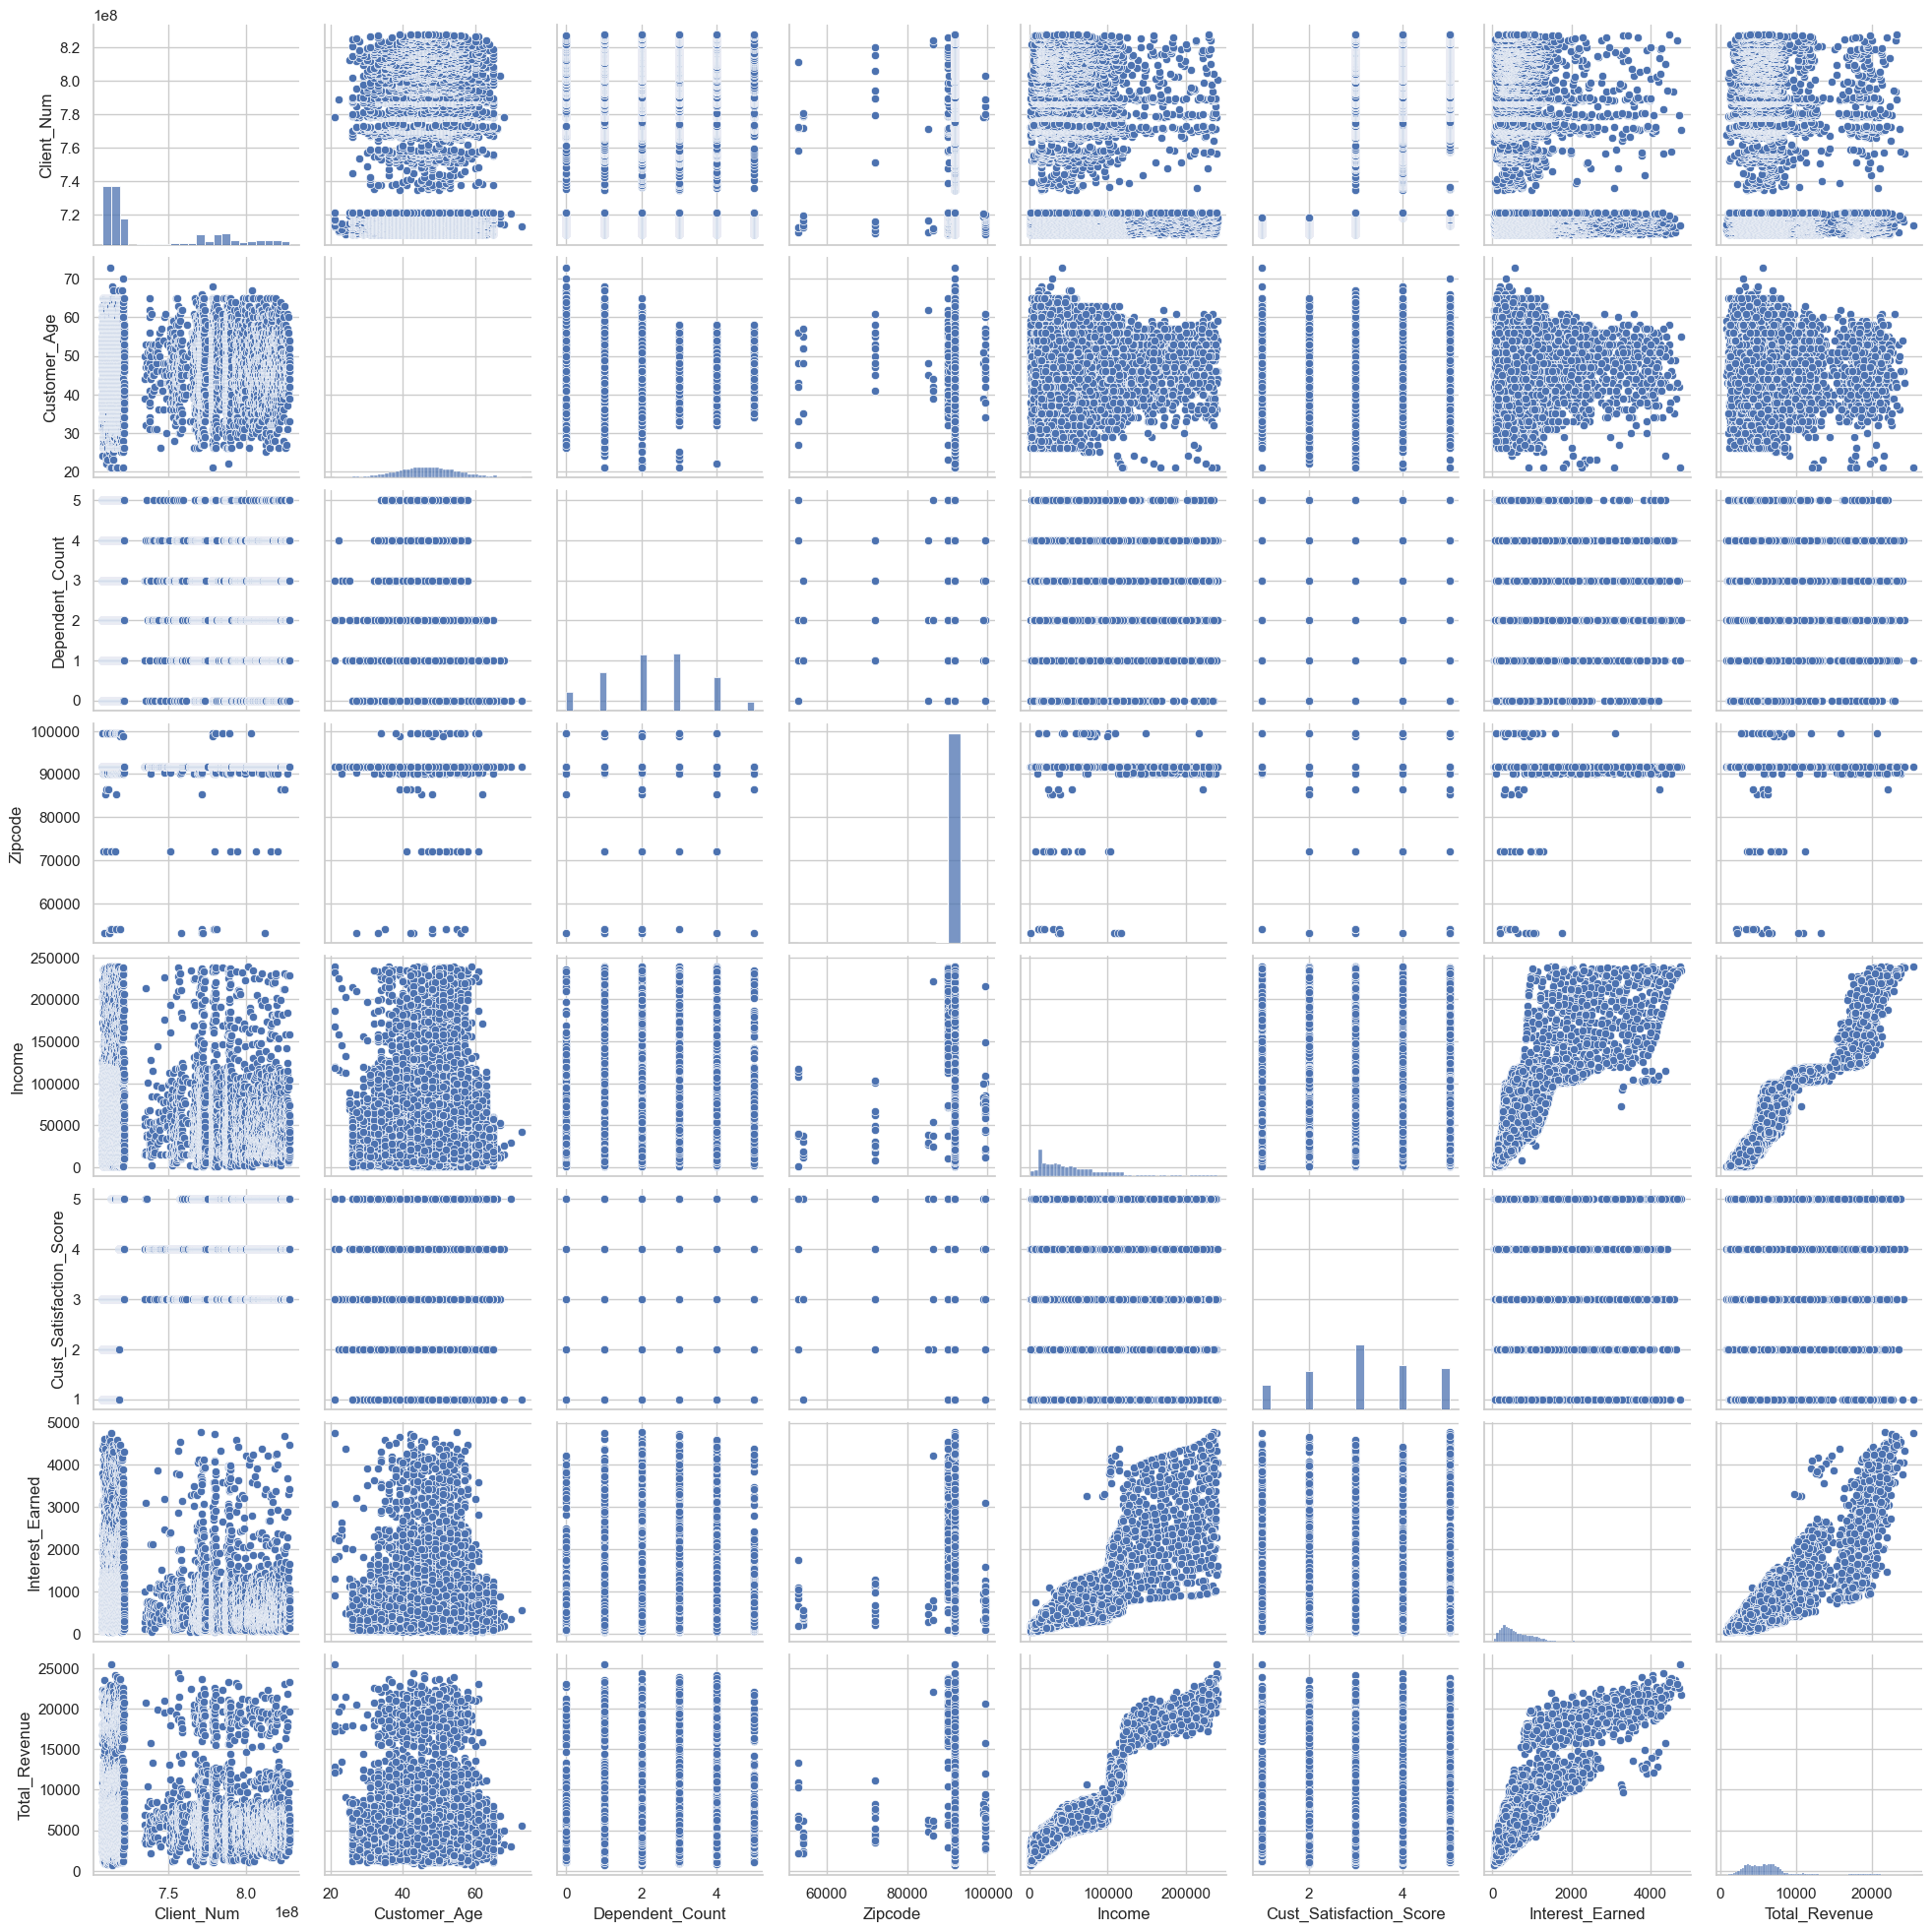

In [90]:
sns.pairplot(data=customer)
plt.show()

# The End`s
# I can find n number/a lot of insights from this datasets
# Thankyou